# Plotting accuracy maps based on AEZs

After running the processing and accuracy assessment steps, you may want to plot the results as a map. This notebook will allow you to do that.

start by importing what you need 

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

/env/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


read in theconfusion matrix csvs as pandas data frames

In [5]:
# read in the institution files, preferably the ones that have had columns dropped already in the processing step
#east_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Eastern_S2_confusion.csv')
#west_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Western_S2_confusion.csv')
#north_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Northern_S2_confusion.csv')
#south_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Southern_S2_confusion.csv')
#cent_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Central_S2_confusion.csv')
#sahel_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Sahel_S2_confusion.csv')
#io_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Indian_ocean_S2_confusion.csv')
#east_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/ValidationPoints_Eastern_terrain.csv')
#west_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/ValidationPoints_Western_terrain.csv')
#north_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/ValidationPoints_Northern_terrain.csv')
#south_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/ValidationPoints_Southern_terrain.csv')
#cent_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/ValidationPoints_Central_terrain.csv')
#sahel_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/ValidationPoints_Sahel_terrain.csv')
#io_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/ValidationPoints_Indian_ocean_terrain.csv')
east_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Eastern_confusion_matrix.csv')
west_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Western_confusion_matrix.csv')
north_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Northern_confusion_matrix.csv')
south_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Southern_confusion_matrix.csv')
cent_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Central_confusion_matrix.csv')
sahel_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/Sahel_confusion_matrix.csv')
io_conf = pd.read_csv('../Results/WOfS_Assessment/Point_Based/ConfusionMatrix/IndianOcean_confusion_matrix.csv')

Now read in the shape files for all of the AEZs

In [6]:
east_shp = gpd.read_file('../Data/AEZs/Eastern.shp')
west_shp = gpd.read_file('../Data/AEZs/Western.shp')
north_shp = gpd.read_file('../Data/AEZs/Northern.shp')
south_shp = gpd.read_file('../Data/AEZs/Southern.shp')
cent_shp = gpd.read_file('../Data/AEZs/Central.shp')
sahel_shp = gpd.read_file('../Data/AEZs/Sahel.shp')
io_shp = gpd.read_file('../Data/AEZs/Indian_ocean.shp')

Next is to add columns for the confusion matrix values we want to each of the shapes.

In [4]:
# to access the overall accuracy use 
east_conf["Producer's"][3]

89.38

In [5]:
# to access the producer's water use 
east_conf["Producer's"][1]

88.34

In [6]:
# and to access the user's water use
east_conf["Water.1"][3]

97.53

Now add these columns to the shape files.

In [7]:
east_shp_cols = east_shp.assign(Overall=east_conf["Producer's"][3],
                                Producer=east_conf["Producer's"][1],
                                User=east_conf["Water.1"][3])
west_shp_cols = west_shp.assign(Overall=west_conf["Producer's"][3],
                                Producer=west_conf["Producer's"][1],
                                User=west_conf["Water.1"][3])
north_shp_cols = north_shp.assign(Overall=north_conf["Producer's"][3],
                                Producer=north_conf["Producer's"][1],
                                User=north_conf["Water.1"][3])
south_shp_cols = south_shp.assign(Overall=south_conf["Producer's"][3],
                                Producer=south_conf["Producer's"][1],
                                User=south_conf["Water.1"][3])
cent_shp_cols = cent_shp.assign(Overall=cent_conf["Producer's"][3],
                                Producer=cent_conf["Producer's"][1],
                                User=cent_conf["Water.1"][3])
sahel_shp_cols = sahel_shp.assign(Overall=sahel_conf["Producer's"][3],
                                Producer=sahel_conf["Producer's"][1],
                                User=sahel_conf["Water.1"][3])
io_shp_cols = io_shp.assign(Overall=io_conf["Producer's"][3],
                                Producer=io_conf["Producer's"][1],
                                User=io_conf["Water.1"][3])

Now to concatenate all of these tables into one.

In [8]:
shapes = [east_shp_cols, west_shp_cols, north_shp_cols, south_shp_cols, cent_shp_cols, sahel_shp_cols, io_shp_cols]
#africa_accuracy = gpd.concat(shapes)
africa_accuracy = gpd.GeoDataFrame(pd.concat(shapes, ignore_index=True), crs=shapes[0].crs)
africa_accuracy

,ID,CODE,COUNTRY,geometry,Overall,Producer,User
0,None,None,Eastern,"MULTIPOLYGON (((39.58210 -9.10003, 39.57632 -9...",86.71,85.87,96.06
1,20,BEN,Western,"MULTIPOLYGON (((-11.49668 6.92937, -11.50105 6...",74.55,71.28,97.44
2,546,-,Northern,"POLYGON ((9.75594 37.34962, 9.76010 37.33980, ...",86.60,84.93,88.07
3,21,BOT,Southern,"MULTIPOLYGON (((32.91685 -25.97825, 32.91281 -...",81.09,74.87,90.42
4,2,ANG,Central,"MULTIPOLYGON (((11.77117 -16.79723, 11.76834 -...",79.47,78.92,95.91
5,43,A,Sahel,"MULTIPOLYGON (((42.95267 12.82343, 42.94446 12...",85.21,86.83,84.63
6,44,COM,Indian_Ocean,"MULTIPOLYGON (((44.22776 -25.22229, 44.22372 -...",78.89,75.97,96.63


And save this out to a shapefile because it will be useful later. 

In [9]:
africa_accuracy.to_file('../Results/WOfS_Assessment/Point_Based/Africa_accuracy_LS_WOfS.shp')

Now the plotting begins!

In [10]:
africa_accuracy['coords'] = africa_accuracy['geometry'].apply(lambda x: x.representative_point().coords[:])
africa_accuracy['coords'] = [coords[0] for coords in africa_accuracy['coords']]

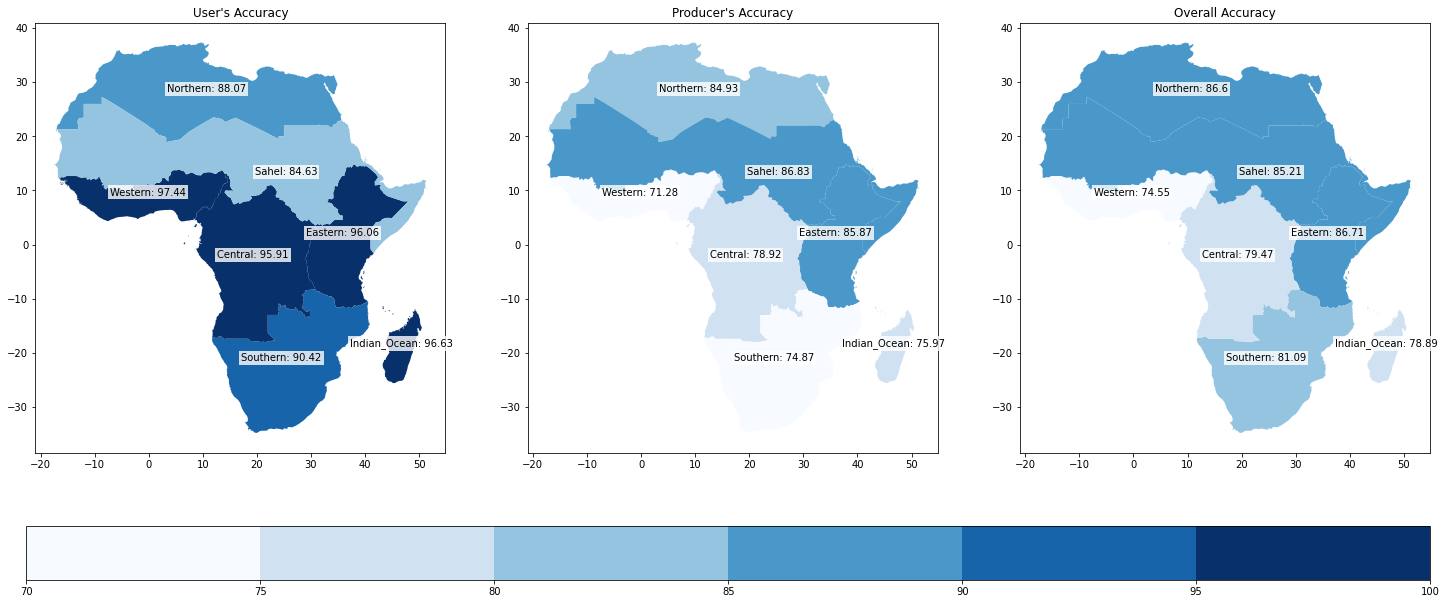

In [11]:
fig, ax = plt.subplots(1,3, figsize=(25,25))
fig.subplots_adjust(bottom=0.2)
cax = fig.add_axes([0.12, 0.35, 0.78, 0.03])
#cax = make_axes_locatable(ax[2]).append_axes("right", size="5%", pad=0.1)
cmap = mpl.cm.Blues
bounds = [70, 75, 80, 85, 90, 95, 100]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
africa_accuracy.plot('User', ax=ax[0], cmap=cmap, vmin=70, vmax=100, norm=norm)
africa_accuracy.plot('Producer', ax=ax[1], cmap=cmap, vmin=70, vmax=100, norm=norm)
africa_accuracy.plot('Overall', ax=ax[2], cmap=cmap, vmin=70, vmax=100, norm=norm)#, 
                     #legend=True)#, cax=cax, legend_kwds={'label': "Percentage Accuracy", 'orientation': "horizontal"})
ax[0].set_title("User's Accuracy")
ax[1].set_title("Producer's Accuracy")
ax[2].set_title('Overall Accuracy')
#fig.colorbar(ax[0], ax=ax[0, :2], location='bottom')
for idx, row in africa_accuracy.iterrows():
    ax[0].text(row.coords[0], row.coords[1], s=row['COUNTRY']+': '+str(row['User']), horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    ax[1].text(row.coords[0], row.coords[1], s=row['COUNTRY']+': '+str(row['Producer']), horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    ax[2].text(row.coords[0], row.coords[1], s=row['COUNTRY']+': '+str(row['Overall']), horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
fig.savefig('aez_accuracy_map_LS.png', bb_inches='tight')

In [ ]:
# Plotting a difference map

In [2]:
s2_acc = gpd.read_file('../Results/WOfS_Assessment/Point_Based/Africa_accuracy_S2_WOfS.shp')

In [15]:
s2_acc

,ID,CODE,COUNTRY,Overall,Producer,User,geometry
0,None,None,Eastern,89.38,88.34,97.53,"MULTIPOLYGON (((39.58210 -9.10003, 39.57632 -9..."
1,20,BEN,Western,79.03,76.47,97.54,"MULTIPOLYGON (((-11.49668 6.92937, -11.50105 6..."
2,546,-,Northern,86.87,77.89,93.37,"POLYGON ((9.75594 37.34962, 9.76010 37.33980, ..."
3,21,BOT,Southern,85.98,79.34,96.04,"MULTIPOLYGON (((32.91685 -25.97825, 32.91281 -..."
4,2,ANG,Central,82.54,82.34,96.33,"MULTIPOLYGON (((11.77117 -16.79723, 11.76834 -..."
5,43,A,Sahel,85.33,83.29,88.81,"MULTIPOLYGON (((42.95267 12.82343, 42.94446 12..."
6,44,COM,Indian_Ocean,83.52,81.70,97.02,"MULTIPOLYGON (((44.22776 -25.22229, 44.22372 -..."


In [16]:
east_s2_cols = east_shp.assign(Overall=s2_acc['Overall'][0]-africa_accuracy['Overall'][0],
                                Producer=s2_acc['Producer'][0]-africa_accuracy['Producer'][0],
                                User=s2_acc['User'][0]-africa_accuracy['User'][0])
west_s2_cols = west_shp.assign(Overall=s2_acc['Overall'][1]-africa_accuracy['Overall'][1],
                                Producer=s2_acc['Producer'][1]-africa_accuracy['Producer'][1],
                                User=s2_acc['User'][1]-africa_accuracy['User'][1])
north_s2_cols = north_shp.assign(Overall=s2_acc['Overall'][2]-africa_accuracy['Overall'][2],
                                Producer=s2_acc['Producer'][2]-africa_accuracy['Producer'][2],
                                User=s2_acc['User'][2]-africa_accuracy['User'][2])
south_s2_cols = south_shp.assign(Overall=s2_acc['Overall'][3]-africa_accuracy['Overall'][3],
                                Producer=s2_acc['Producer'][3]-africa_accuracy['Producer'][3],
                                User=s2_acc['User'][3]-africa_accuracy['User'][3])
cent_s2_cols = cent_shp.assign(Overall=s2_acc['Overall'][4]-africa_accuracy['Overall'][4],
                                Producer=s2_acc['Producer'][4]-africa_accuracy['Producer'][4],
                                User=s2_acc['User'][4]-africa_accuracy['User'][4])
sahel_s2_cols = sahel_shp.assign(Overall=s2_acc['Overall'][5]-africa_accuracy['Overall'][5],
                                Producer=s2_acc['Producer'][5]-africa_accuracy['Producer'][5],
                                User=s2_acc['User'][5]-africa_accuracy['User'][5])
io_s2_cols = io_shp.assign(Overall=s2_acc['Overall'][6]-africa_accuracy['Overall'][6],
                                Producer=s2_acc['Producer'][6]-africa_accuracy['Producer'][6],
                                User=s2_acc['User'][6]-africa_accuracy['User'][6])

In [24]:
shapes = [east_s2_cols.round(decimals=2), west_s2_cols.round(decimals=2), north_s2_cols.round(decimals=2), south_s2_cols.round(decimals=2), cent_s2_cols.round(decimals=2), sahel_s2_cols.round(decimals=2), io_s2_cols.round(decimals=2)]
#africa_accuracy = gpd.concat(shapes)
s2_acc = gpd.GeoDataFrame(pd.concat(shapes, ignore_index=True), crs=shapes[0].crs)
s2_acc

,ID,CODE,COUNTRY,geometry,Overall,Producer,User
0,None,None,Eastern,"MULTIPOLYGON (((39.58210 -9.10003, 39.57632 -9...",2.67,2.47,1.47
1,20,BEN,Western,"MULTIPOLYGON (((-11.49668 6.92937, -11.50105 6...",4.48,5.19,0.10
2,546,-,Northern,"POLYGON ((9.75594 37.34962, 9.76010 37.33980, ...",0.27,-7.04,5.30
3,21,BOT,Southern,"MULTIPOLYGON (((32.91685 -25.97825, 32.91281 -...",4.89,4.47,5.62
4,2,ANG,Central,"MULTIPOLYGON (((11.77117 -16.79723, 11.76834 -...",3.07,3.42,0.42
5,43,A,Sahel,"MULTIPOLYGON (((42.95267 12.82343, 42.94446 12...",0.12,-3.54,4.18
6,44,COM,Indian_Ocean,"MULTIPOLYGON (((44.22776 -25.22229, 44.22372 -...",4.63,5.73,0.39


In [26]:
s2_acc['coords'] = s2_acc['geometry'].apply(lambda x: x.representative_point().coords[:])
s2_acc['coords'] = [coords[0] for coords in s2_acc['coords']]

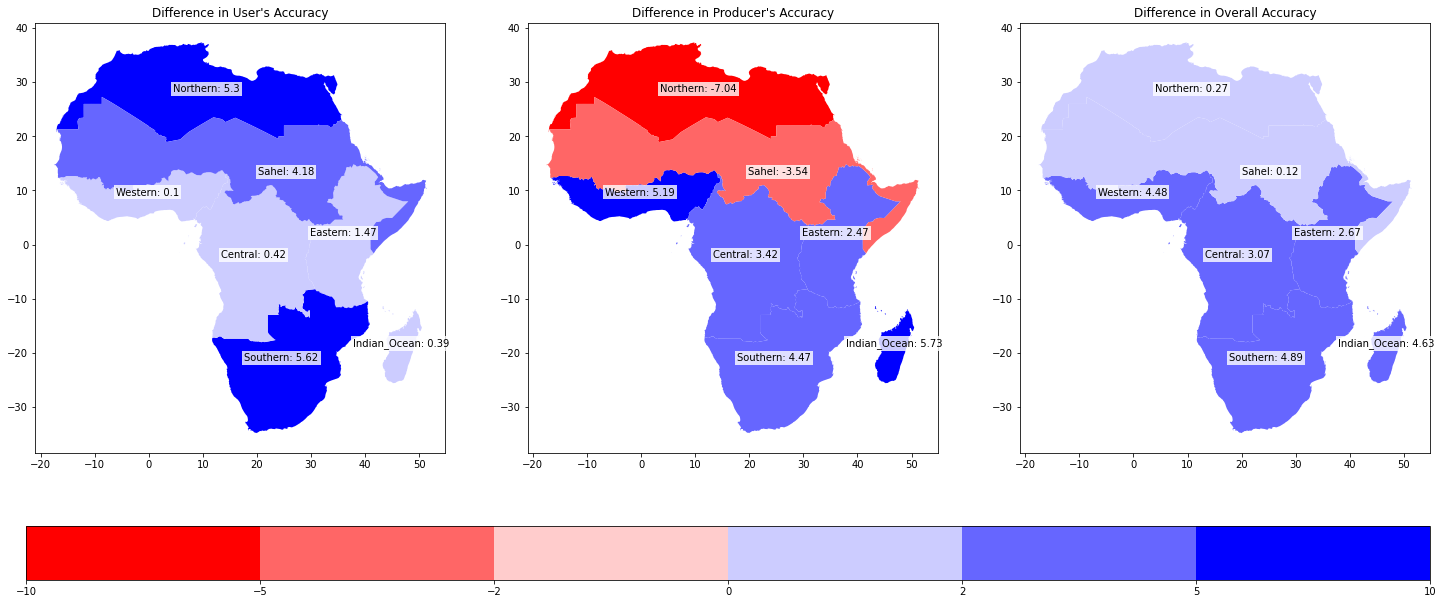

In [27]:
fig, ax = plt.subplots(1,3, figsize=(25,25))
fig.subplots_adjust(bottom=0.2)
cax = fig.add_axes([0.12, 0.35, 0.78, 0.03])
#cax = make_axes_locatable(ax[2]).append_axes("right", size="5%", pad=0.1)
cmap = mpl.cm.bwr_r
bounds = [-10, -5, -2, 0, 2, 5, 10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
s2_acc.plot('User', ax=ax[0], cmap=cmap, vmin=70, vmax=100, norm=norm)
s2_acc.plot('Producer', ax=ax[1], cmap=cmap, vmin=70, vmax=100, norm=norm)
s2_acc.plot('Overall', ax=ax[2], cmap=cmap, vmin=70, vmax=100, norm=norm)#, 
                     #legend=True)#, cax=cax, legend_kwds={'label': "Percentage Accuracy", 'orientation': "horizontal"})
ax[0].set_title("Difference in User's Accuracy")
ax[1].set_title("Difference in Producer's Accuracy")
ax[2].set_title('Difference in Overall Accuracy')
#fig.colorbar(ax[0], ax=ax[0, :2], location='bottom')
for idx, row in s2_acc.iterrows():
    ax[0].text(row.coords[0], row.coords[1], s=row['COUNTRY']+': '+str(row['User']), horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    ax[1].text(row.coords[0], row.coords[1], s=row['COUNTRY']+': '+str(row['Producer']), horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    ax[2].text(row.coords[0], row.coords[1], s=row['COUNTRY']+': '+str(row['Overall']), horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
fig.savefig('aez_accuracy_difference_s2_map.png', bb_inches='tight')